# HW3 Grid Search

### In this notebook I...
- use the  dataset and the features from HW2
- create a pipeline
- run a grid search
- store results csvs

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# custom functions
from helpers.pipeline import *

In [2]:
%matplotlib inline
sns.set(style="darkgrid")

In [3]:
# Reading
files = ["data/credit-data.csv"]

frames = [ pd.read_csv(file) for file in files ]
for frame in frames:
    frame.columns = map(str.lower, frame.columns)
df = pd.concat(frames)

In [4]:
df.columns

Index(['personid', 'seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines',
       'age', 'zipcode', 'numberoftime30-59dayspastduenotworse', 'debtratio',
       'monthlyincome', 'numberofopencreditlinesandloans',
       'numberoftimes90dayslate', 'numberrealestateloansorlines',
       'numberoftime60-89dayspastduenotworse', 'numberofdependents'],
      dtype='object')

In [5]:
# binning
df['income_bins'] = pd.cut(df.monthlyincome, bins=15)
agebins = [0] + list(range(20, 100, 10)) + [120]
df['age_bins'] = pd.cut(df['age'], bins=agebins)

#discretization
df = categorical_dummies(df, ['numberofdependents','income_bins', 'age_bins'])

## train-test split

In [6]:
X = df.drop(['seriousdlqin2yrs','age_bins', 'income_bins'], axis=1)
y = df['seriousdlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=8)

In [7]:
# inputing
X_train = mean_inputation(X_train)
X_test = mean_inputation(X_test)

# scaling income and debt ratios
pd.options.mode.chained_assignment = None
robust_scaler = RobustScaler()
X_train['monthlyincome_scaled'] =  robust_scaler.fit_transform(X_train['monthlyincome'].values.reshape(-1,1))
X_test['monthlyincome_scaled'] =  robust_scaler.transform(X_test['monthlyincome'].values.reshape(-1,1))
X_train['debtratio_scaled'] =  robust_scaler.fit_transform(X_train['debtratio'].values.reshape(-1,1))
X_test['debtratio_scaled'] =  robust_scaler.transform(X_test['debtratio'].values.reshape(-1,1))

//anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
print("models available:", list(CLFS.keys()))

models available: ['RF', 'ET', 'AB', 'LR', 'SVM', 'GB', 'NB', 'DT', 'SGD', 'KNN']



1.) Tuning hyperparameters for 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) on accuracy

{'n_estimators': [1, 10], 'max_depth': [1, 5, 10, 20], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, 10]}
2.) Classification report

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       560
          1       0.60      0.07      0.13        40

avg / total       0.92      0.94      0.91       600

3.) Precision Recall



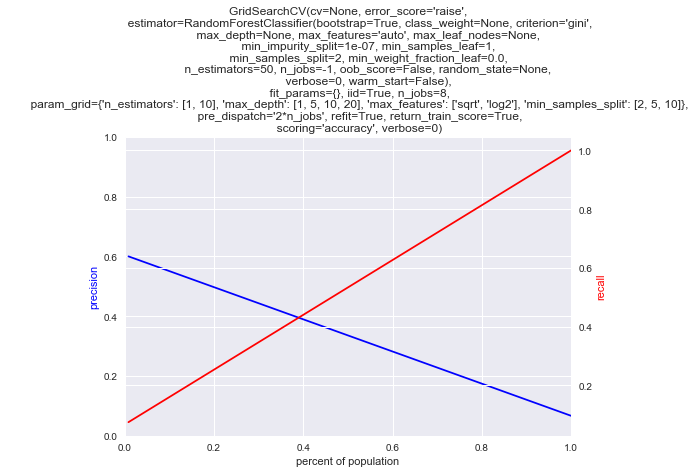

4.) Grid computation time

####RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)####
max mean: 0.14 max std: 0.01

1.) Tuning hyperparameters for 
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False) on accuracy

{'n_estimators': [1, 10], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 5, 10, 20, 50], 'max_features': ['sqrt', 'log2'

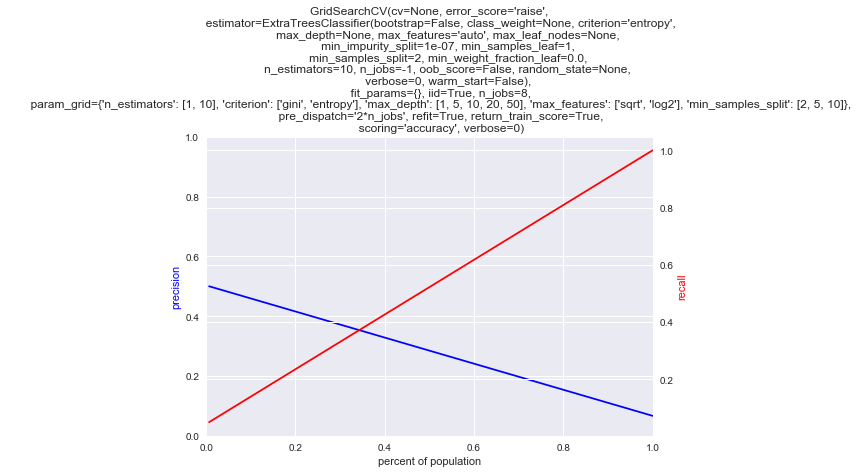

4.) Grid computation time

####ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)####
max mean: 0.14 max std: 0.01

1.) Tuning hyperparameters for 
 AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None) on accuracy

{'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1, 10]}
2.) Clas

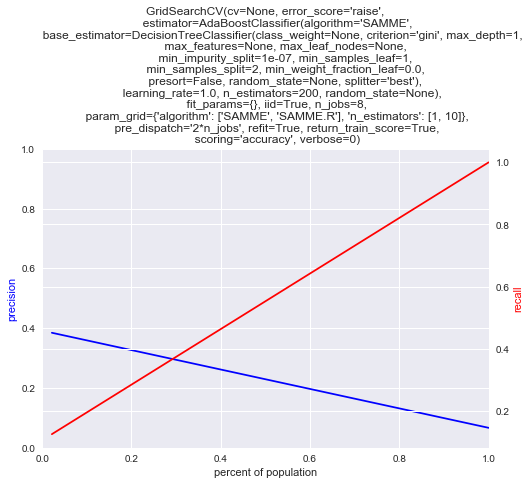

4.) Grid computation time

####AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)####
max mean: 0.05 max std: 0.00

1.) Tuning hyperparameters for 
 LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) on accuracy

{'penalty': ['l1', 'l2'], 'C': [0.0001, 0.01, 0.1, 1]}
2.) Classification report

             precision    recall  f1-score   support

          0       0.94      1.00      0.97  

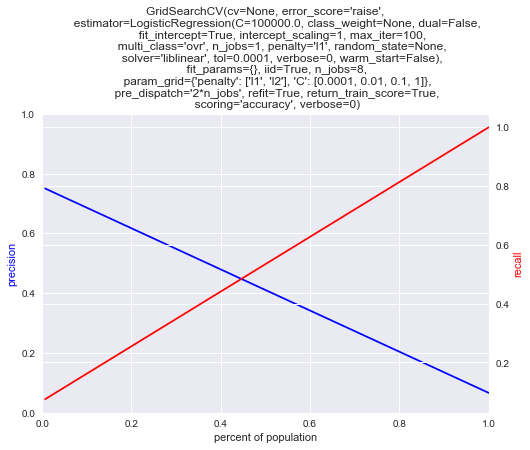

4.) Grid computation time

####LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)####
max mean: 0.05 max std: 0.04

1.) Tuning hyperparameters for 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=0.5, verbose=0, warm_start=False) on accuracy

{'n_estimators': [1, 10], 'learning_rate': [0.001, 0.01, 0.05, 0.1], 'subsample': [0.1, 0.5, 1.0], 'max_depth': [1, 3, 5, 10, 20]}
2.) Classification report

             precision    reca

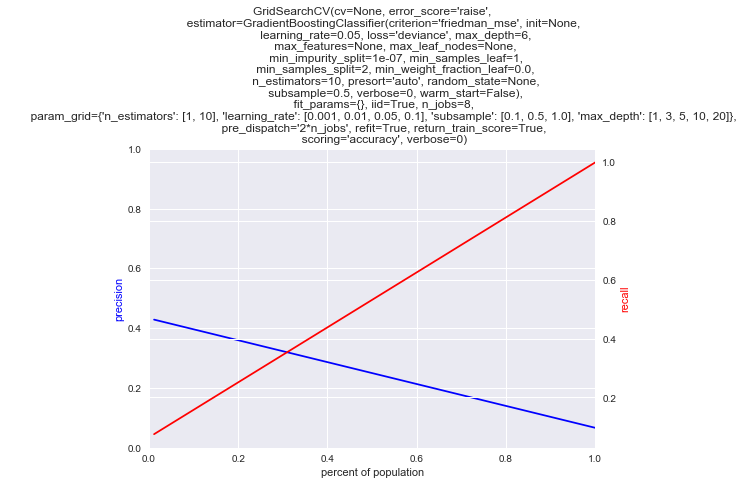

4.) Grid computation time

####GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=0.5, verbose=0, warm_start=False)####
max mean: 0.20 max std: 0.06

1.) Tuning hyperparameters for 
 GaussianNB(priors=None) on accuracy

{}
2.) Classification report

             precision    recall  f1-score   support

          0       0.98      0.22      0.36       560
          1       0.08      0.95      0.15        40

avg / total       0.92      0.27      0.35       600

3.) Precision Recall



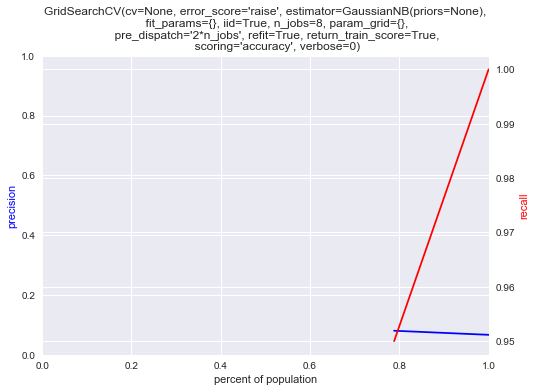

4.) Grid computation time

####GaussianNB(priors=None)####
max mean: 0.01 max std: 0.00

1.) Tuning hyperparameters for 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') on accuracy

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 5, 10, 20, 50], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, 10]}
2.) Classification report

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       560
          1       0.00      0.00      0.00        40

avg / total       0.87      0.93      0.90       600

3.) Precision Recall



//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


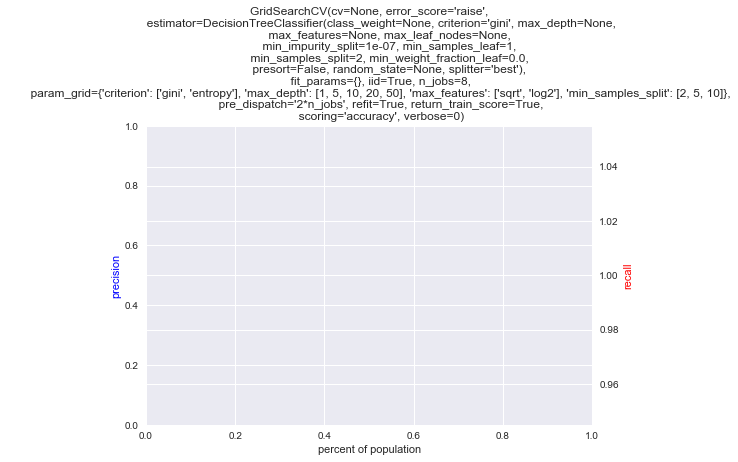

4.) Grid computation time

####DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')####
max mean: 0.02 max std: 0.01

1.) Tuning hyperparameters for 
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False) on accuracy

{'loss': ['hinge', 'log', 'perceptron'], 'penalty': ['l2', 'l1', 'elasticnet']}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2.) Classification report

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       560
          1       0.00      0.00      0.00        40

avg / total       0.87      0.93      0.90       600

3.) Precision Recall



//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


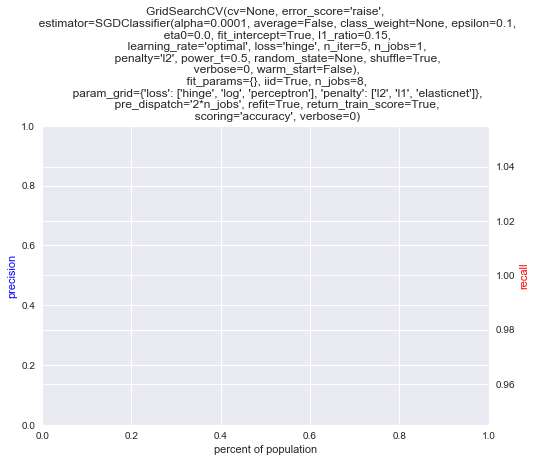

4.) Grid computation time

####SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)####
max mean: 0.01 max std: 0.00

1.) Tuning hyperparameters for 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform') on accuracy

{'n_neighbors': [1, 5, 10, 25, 50], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2.) Classification report

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       560
          1       0.00      0.00      0.00        40

avg / total       0.87      0.93      0.90       600

3.) Precision Recall



//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


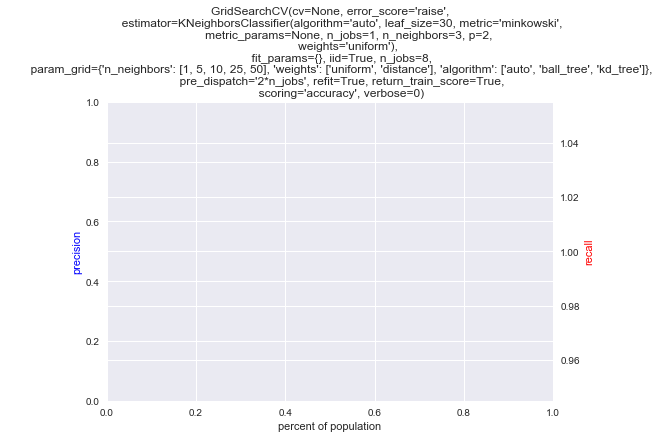

4.) Grid computation time

####KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')####
max mean: 0.01 max std: 0.00

1.) Tuning hyperparameters for 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) on precision

{'n_estimators': [1, 10], 'max_depth': [1, 5, 10, 20], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, 10]}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarnin

2.) Classification report

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       560
          1       0.43      0.07      0.13        40

avg / total       0.90      0.93      0.91       600

3.) Precision Recall



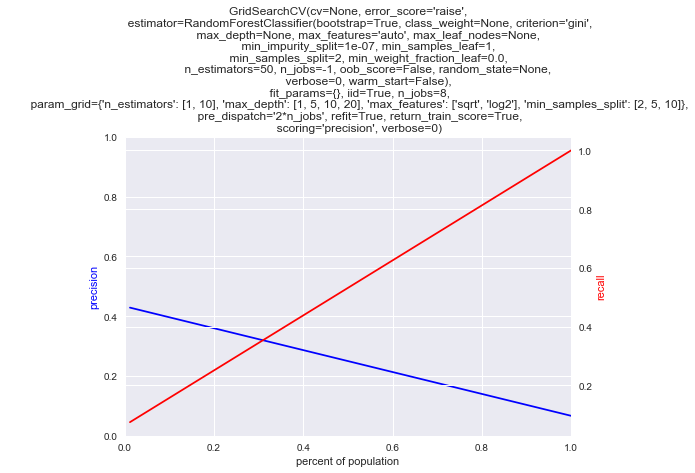

4.) Grid computation time

####RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)####
max mean: 0.16 max std: 0.01

1.) Tuning hyperparameters for 
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False) on precision

{'n_estimators': [1, 10], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 5, 10, 20, 50], 'max_features': ['sqrt', 'log2

//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarnin

2.) Classification report

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       560
          1       0.43      0.07      0.13        40

avg / total       0.90      0.93      0.91       600

3.) Precision Recall



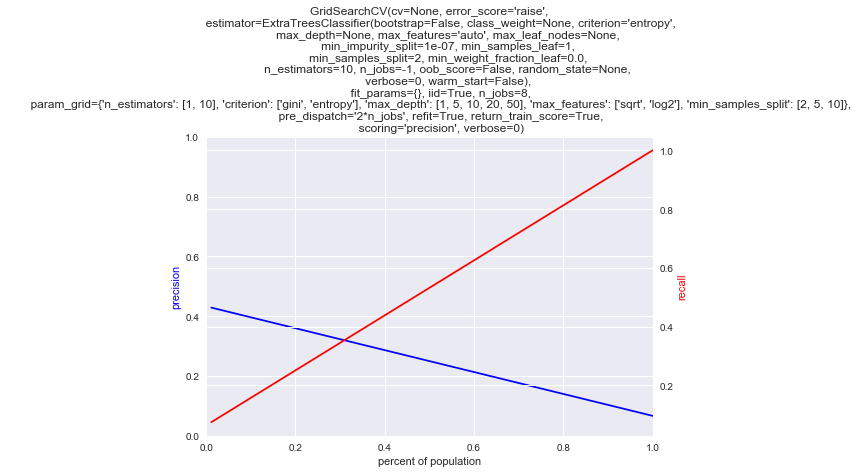

4.) Grid computation time

####ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)####
max mean: 0.17 max std: 0.01

1.) Tuning hyperparameters for 
 AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None) on precision

{'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1, 10]}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2.) Classification report

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       560
          1       0.38      0.12      0.19        40

avg / total       0.90      0.93      0.91       600

3.) Precision Recall



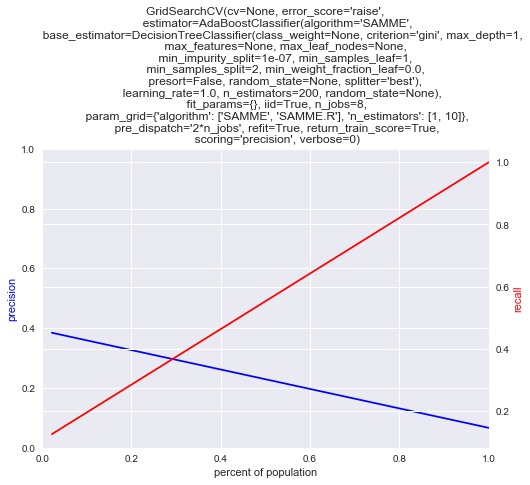

4.) Grid computation time

####AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)####
max mean: 0.05 max std: 0.00

1.) Tuning hyperparameters for 
 LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) on precision

{'penalty': ['l1', 'l2'], 'C': [0.0001, 0.01, 0.1, 1]}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarnin

2.) Classification report

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       560
          1       0.75      0.07      0.14        40

avg / total       0.93      0.94      0.91       600

3.) Precision Recall



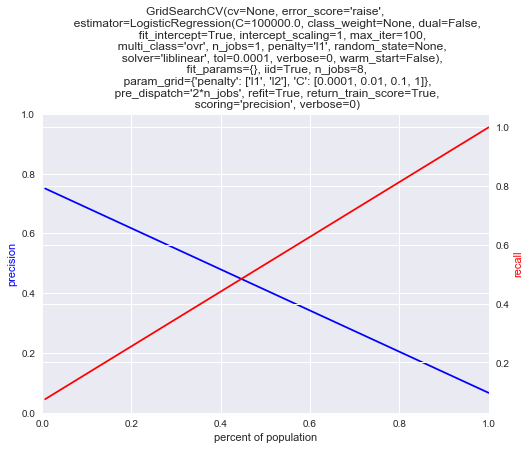

4.) Grid computation time

####LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)####
max mean: 0.02 max std: 0.01

1.) Tuning hyperparameters for 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=0.5, verbose=0, warm_start=False) on precision

{'n_estimators': [1, 10], 'learning_rate': [0.001, 0.01, 0.05, 0.1], 'subsample': [0.1, 0.5, 1.0], 'max_depth': [1, 3, 5, 10, 20]}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarnin

2.) Classification report

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       560
          1       1.00      0.03      0.05        40

avg / total       0.94      0.94      0.91       600

3.) Precision Recall



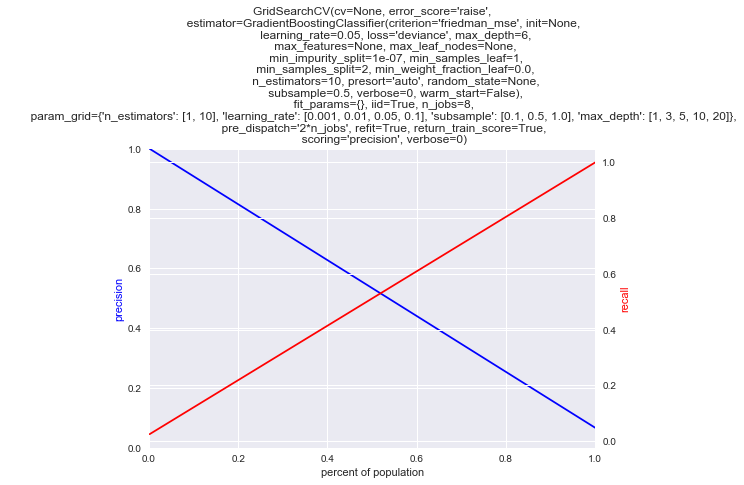

4.) Grid computation time

####GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=0.5, verbose=0, warm_start=False)####
max mean: 0.13 max std: 0.02

1.) Tuning hyperparameters for 
 GaussianNB(priors=None) on precision

{}
2.) Classification report

             precision    recall  f1-score   support

          0       0.98      0.22      0.36       560
          1       0.08      0.95      0.15        40

avg / total       0.92      0.27      0.35       600

3.) Precision Recall



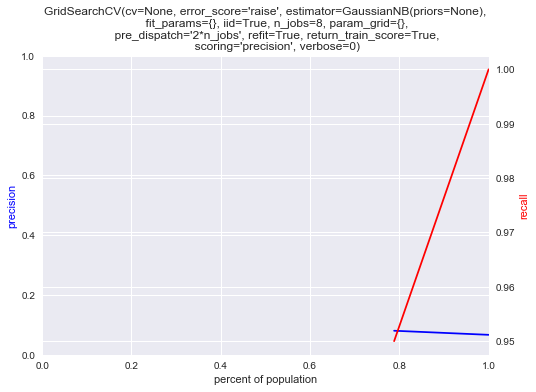

4.) Grid computation time

####GaussianNB(priors=None)####
max mean: 0.01 max std: 0.00

1.) Tuning hyperparameters for 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') on precision

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 5, 10, 20, 50], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, 10]}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarnin

2.) Classification report

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       560
          1       0.25      0.05      0.08        40

avg / total       0.89      0.93      0.90       600

3.) Precision Recall



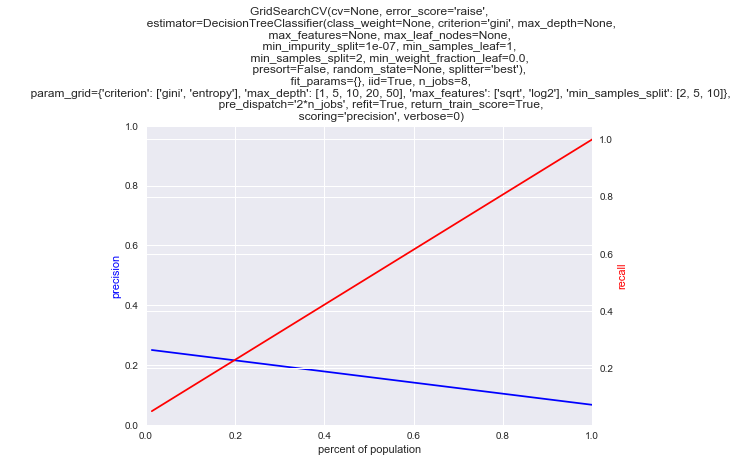

4.) Grid computation time

####DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')####
max mean: 0.02 max std: 0.01

1.) Tuning hyperparameters for 
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False) on precision

{'loss': ['hinge', 'log', 'perceptron'], 'penalty': ['l2', 'l1', 'elasticnet']}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarnin

2.) Classification report

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       560
          1       0.00      0.00      0.00        40

avg / total       0.87      0.93      0.90       600

3.) Precision Recall



//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


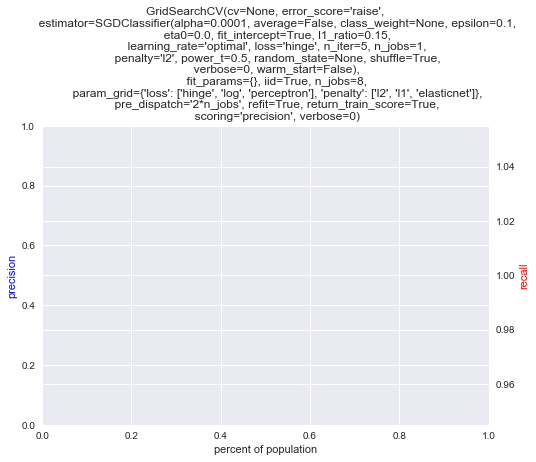

4.) Grid computation time

####SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)####
max mean: 0.03 max std: 0.01

1.) Tuning hyperparameters for 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform') on precision

{'n_neighbors': [1, 5, 10, 25, 50], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarnin

2.) Classification report

             precision    recall  f1-score   support

          0       0.93      0.92      0.93       560
          1       0.04      0.05      0.05        40

avg / total       0.87      0.86      0.87       600

3.) Precision Recall



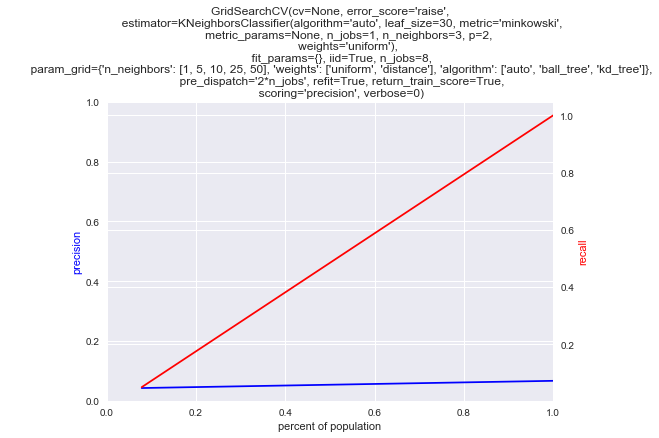

4.) Grid computation time

####KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')####
max mean: 0.02 max std: 0.01


In [9]:
models_to_run = ['RF', 'ET', 'AB', 'LR', 'GB', 'NB', 'DT', 'SGD', 'KNN']
results = run_search(X_train, y_train, models_to_run)

In [12]:
# see the csv itself - clf are not showing up
results

,clf,target,accuracy,precision,recall,time,params
0,(),accuracy,0.935000,0.600000,0.535714,0.138253,"{'cv': None, 'error_score': 'raise', 'estimato..."
1,(),accuracy,0.933333,0.500000,0.523214,0.135759,"{'cv': None, 'error_score': 'raise', 'estimato..."
2,(),accuracy,0.928333,0.384615,0.555357,0.047040,"{'cv': None, 'error_score': 'raise', 'estimato..."
3,"LogisticRegression(C=100000.0, class_weight=No...",accuracy,0.936667,0.750000,0.536607,0.046265,"{'cv': None, 'error_score': 'raise', 'estimato..."
4,(),accuracy,0.931667,0.428571,0.533929,0.196328,"{'cv': None, 'error_score': 'raise', 'estimato..."
5,GaussianNB(priors=None),accuracy,0.271667,0.080338,0.586607,0.013436,"{'cv': None, 'error_score': 'raise', 'estimato..."
6,"DecisionTreeClassifier(class_weight=None, crit...",accuracy,0.933333,0.000000,0.500000,0.021266,"{'cv': None, 'error_score': 'raise', 'estimato..."
7,"SGDClassifier(alpha=0.0001, average=False, cla...",accuracy,0.933333,0.000000,0.500000,0.012493,"{'cv': None, 'error_score': 'raise', 'estimato..."
8,"KNeighborsClassifier(algorithm='auto', leaf_si...",accuracy,0.933333,0.000000,0.500000,0.011750,"{'cv': None, 'error_score': 'raise', 'estimato..."
9,(),precision,0.931667,0.428571,0.533929,0.156469,"{'cv': None, 'error_score': 'raise', 'estimato..."
